In [1]:
# lib
import sys

sys.path.append("..")

# set cwd one up
import os

os.chdir("..")

In [2]:
from torch import device, float64, set_default_dtype
from torch.cuda import get_device_name, is_available, memory_allocated, memory_reserved

# find gpu if available, and name
device = device("cuda" if is_available() else "cpu")
device = "cpu"
print(device)
set_default_dtype(float64)

# show device info
if is_available():
    print(get_device_name(0))
    print("Memory Usage:")
    print("Allocated:", round(memory_allocated(0) / 1024**3, 1), "GB")
    print("Cached:   ", round(memory_reserved(0) / 1024**3, 1), "GB")

cpu


Loaded data with 12 cells and 4 background noise models
Plots: on


Fitting background noise...
Background noise model:
Standard deviation: 11.553871266552218

Detrending and denoising cell data...


/Users/tristansones-dykes/scientific-computing/Python/MT5099/PyroCell/pyrocell/gp/pyro/backend.py:235: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1729646995093/work/aten/src/ATen/native/TensorShape.cpp:3687.)
  term1 = -0.5 * matmul(residual.T, solve(K_with_noise, residual))


KeyboardInterrupt: 

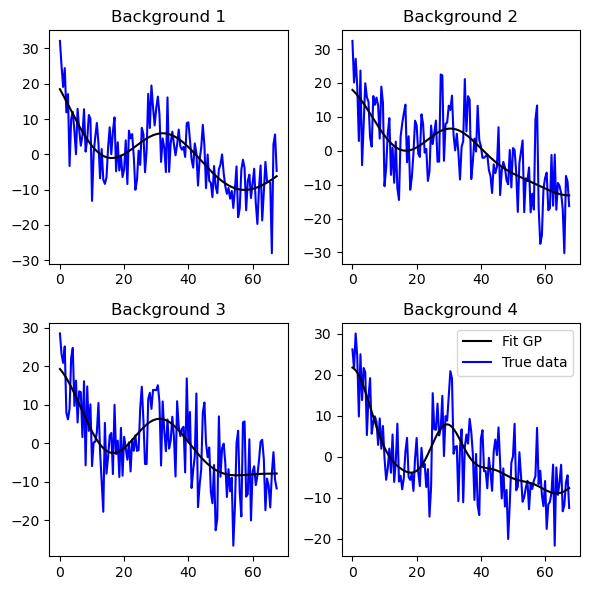

In [3]:
from pyrocell.gp.pyro import OscillatorDetector

path = "data/hes/Hes1_example.csv"
osc = OscillatorDetector(path)

params = {
    "verbose": True,
    "plots": ["background"],
    "jitter": 1.0e-4,
}
osc.fit_models(**params)

In [ ]:
for model in osc.bckgd_models:
    print(model.log_likelihood().item())

-513.0195297518151
-509.23863442705306
-501.2166450134203
-473.8712346216838


/home/tristan/PyroCell/pyrocell/gp/pyro.py:213: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647378361/work/aten/src/ATen/native/TensorShape.cpp:3683.)
  term1 = -0.5 * matmul(residual.T, solve(K_with_noise, residual))


In [ ]:
osc.plot("detrend")

AttributeError: 'OscillatorDetector' object has no attribute 'model_detrend'

In [ ]:
print([(ouosc > ou).item() for ouosc, ou in zip(osc.OUosc_LL, osc.OU_LL)])

TypeError: '>' not supported between instances of 'NoneType' and 'Tensor'

In [ ]:
print(osc.OUosc_LL)
print(osc.OU_LL)

[tensor(-54.3803), tensor(-22.3746), tensor(-10.0329), tensor(18.5148), tensor(-87.5895), tensor(-13.8988), tensor(-27.9849), tensor(-30.7543), tensor(-41.0290), tensor(-41.1797), tensor(-35.1016), tensor(-11.5442)]
[tensor(-19.5460), tensor(-1.7328), tensor(-15.4285), tensor(-21.0663), tensor(-35.6265), tensor(-28.7920), tensor(-31.5470), tensor(-50.4436), tensor(-26.2639), tensor(-47.3877), tensor(-4.6171), tensor(11.3609)]
